In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_excel("C:\\Users\\saral\\OneDrive\\Desktop\\Projects\\Project_4\\Online Retail.xlsx")

In [4]:
# Data Cleaning
df.dropna(subset=['CustomerID'],inplace=True)
df['TotalAmount']=df['UnitPrice']* df['Quantity']
#df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
if 'InvoiceDate' in df.columns:
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
else:
    print("Column 'InvoiceDate' not found!")

In [5]:
# Data Exploration
print(df.describe())
print(df.info())
print(df.head())

            Quantity      UnitPrice     CustomerID    TotalAmount
count  406829.000000  406829.000000  406829.000000  406829.000000
mean       12.061303       3.460471   15287.690570      20.401854
std       248.693370      69.315162    1713.600303     427.591718
min    -80995.000000       0.000000   12346.000000 -168469.600000
25%         2.000000       1.250000   13953.000000       4.200000
50%         5.000000       1.950000   15152.000000      11.100000
75%        12.000000       3.750000   16791.000000      19.500000
max     80995.000000   38970.000000   18287.000000  168469.600000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64      

In [6]:
# Sales over Time
df.set_index('InvoiceDate',inplace=True)
monthly_sales=df['TotalAmount'].resample('M').sum()

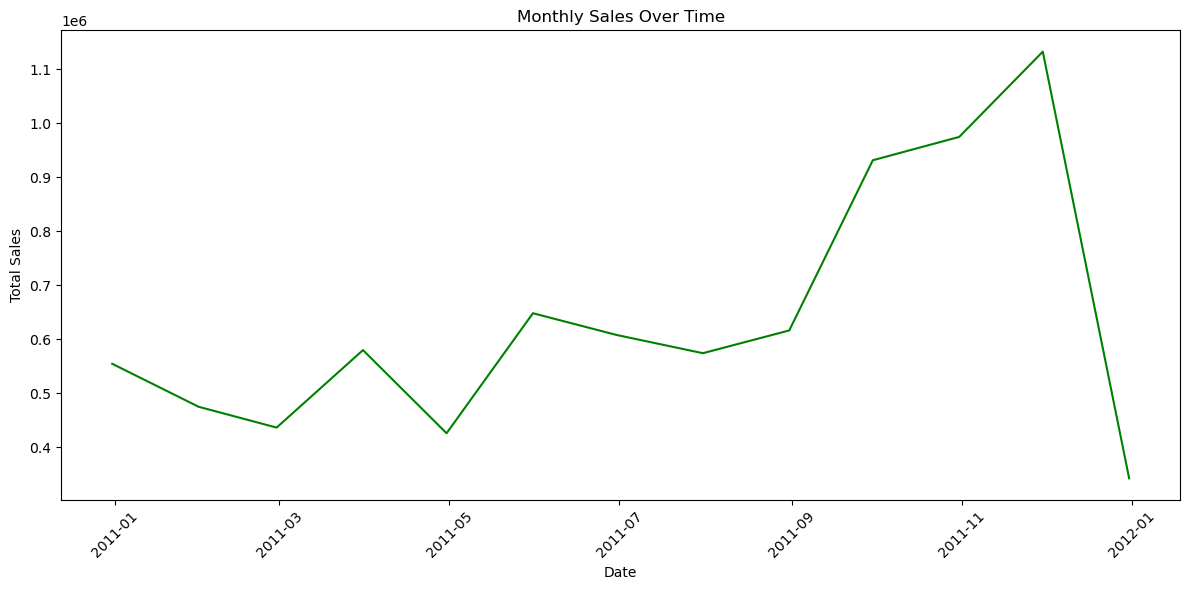

In [13]:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales,color='Green')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

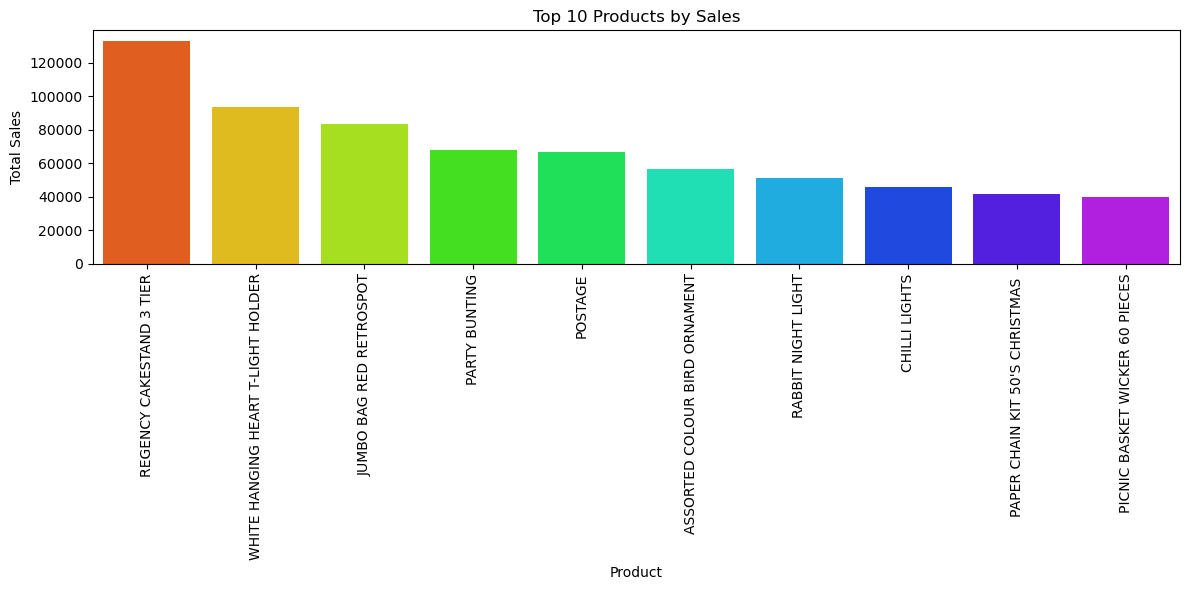

In [36]:
# Top Products by Sales
top_products= df.groupby('Description')['TotalAmount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_products.index,y=top_products.values,palette="gist_rainbow")
plt.title('Top 10 Products by Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
        

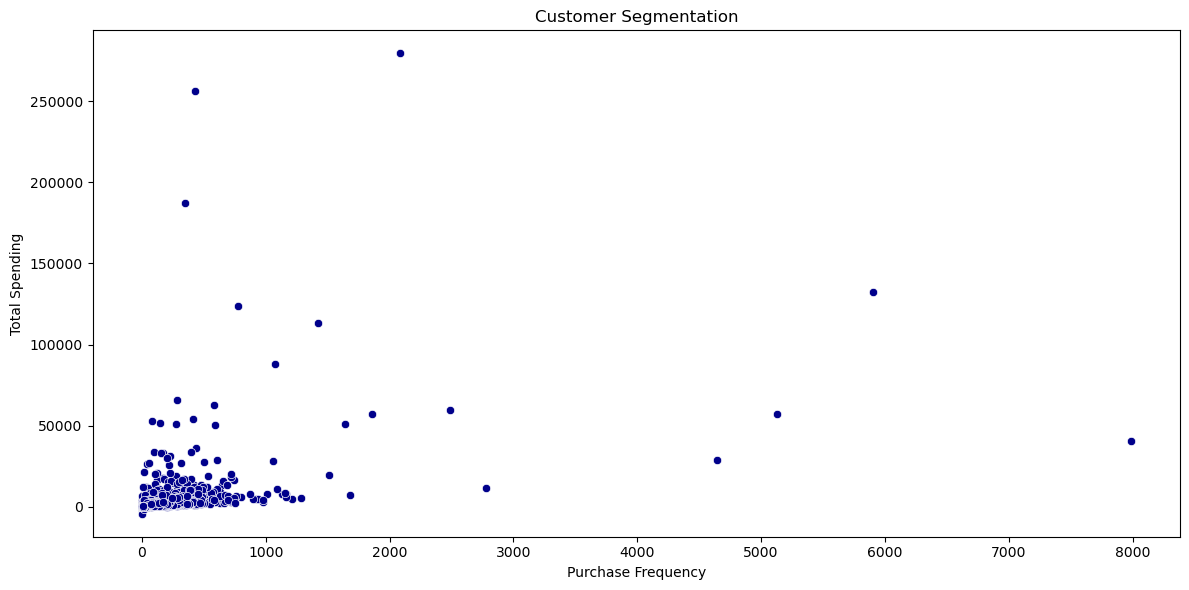

In [34]:
# Customer Segmentation
customer_summary=df.groupby('CustomerID').agg({'TotalAmount':'sum','InvoiceNo':'count'}).reset_index()
customer_summary.rename(columns={'TotalAmount':'TotalSpending','InvoiceNo':'PurchaseFrequency'},inplace=True)
plt.figure(figsize=(12,6))
sns.scatterplot(data=customer_summary,x='PurchaseFrequency',y='TotalSpending', color='DarkBlue')
plt.title('Customer Segmentation')
plt.xlabel('Purchase Frequency')
plt.ylabel('Total Spending')
plt.tight_layout()
plt.show()